BASIC:
Drinking water from an improved source, provided collection time is not more than 30 minutes for a round trip, including queuing

LIMITED:
Drinking water from an improved source, for which collection time exceeds 30 minutes for a round trip, including queuing

UNIMPROVED:
Drinking water from an unprotected dug well or unprotected spring

SURFACE WATER:
Drinking water directly from a river, dam, lake, pond, stream, canal or irrigation canal

sourced from https://data.unicef.org/topic/water-and-sanitation/drinking-water/

**Imports**

In [3]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import joblib
from joblib import parallel_backend
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import calinski_harabasz_score,silhouette_score

**Data Loading and Data Cleaning**


In [6]:
df = pd.read_csv("Estimates of the use of water (2000-2020).csv")

In [7]:
df.tail(20)

,name,year,pop_n,pop_u,wat_bas_n,wat_lim_n,wat_unimp_n,wat_sur_n,wat_bas_r,wat_lim_r,wat_unimp_r,wat_sur_r,wat_bas_u,wat_lim_u,wat_unimp_u,wat_sur_u
444,Mozambique,2015,27042.00195,34.400002,51.176175,10.371408,26.513493,11.938923,35.971379,12.367080,34.814874,16.846667,80.171366,6.565710,10.682954,2.579970181
445,Burkina Faso,2015,18110.61523,27.530001,50.137131,25.673541,22.430179,1.759149,38.855164,30.202185,28.648694,2.293957,79.835792,13.752335,6.060553,0.3513198178
446,Ethiopia,2020,114963.5859,21.695000,49.615573,26.740720,18.635060,5.008647,40.030139,30.186683,23.495613,6.287564,84.212828,14.303009,1.091582,0.392580896
447,Madagascar,2015,24234.08008,35.192997,48.891774,2.677160,30.406737,18.024330,33.144578,1.743479,39.698000,25.413943,77.889831,4.396510,13.297114,4.416545719
448,Somalia,2015,13797.2041,43.245003,48.711154,23.406188,20.154107,7.728552,29.228193,28.887149,28.975789,12.908870,74.280709,16.212942,8.576478,0.9298710922
449,Uganda,2015,38225.44531,22.059999,47.841558,30.095404,15.106768,6.956269,39.717003,34.176563,17.519117,8.587316,76.546356,15.676293,6.583719,1.193631242
450,Burkina Faso,2020,20903.27734,30.607000,47.214854,31.273003,21.158633,0.353510,32.718259,38.626903,28.340446,0.314393,80.081919,14.600049,4.875836,0.4421957805
451,Niger,2020,24206.63672,16.625999,46.911797,21.653899,27.027512,4.406791,39.154159,23.987740,31.991506,4.866594,85.813840,9.950441,2.134688,2.101031634
452,Chad,2020,16425.85938,23.520000,46.187535,14.740289,31.562457,7.509719,37.575215,14.353961,38.524968,9.545856,74.192223,15.996514,8.922453,0.8888103843
453,Democratic Republic of the Congo,2020,89561.40625,45.638000,45.952127,13.441224,32.542316,8.064332,21.982792,12.682941,51.215982,14.118285,74.503355,14.344458,10.299059,0.8531284131


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         464 non-null    object 
 1   year         464 non-null    int64  
 2   pop_n        464 non-null    object 
 3   pop_u        464 non-null    float64
 4   wat_bas_n    461 non-null    float64
 5   wat_lim_n    461 non-null    float64
 6   wat_unimp_n  461 non-null    float64
 7   wat_sur_n    446 non-null    float64
 8   wat_bas_r    339 non-null    float64
 9   wat_lim_r    339 non-null    float64
 10  wat_unimp_r  339 non-null    float64
 11  wat_sur_r    330 non-null    float64
 12  wat_bas_u    364 non-null    float64
 13  wat_lim_u    364 non-null    float64
 14  wat_unimp_u  364 non-null    float64
 15  wat_sur_u    361 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory usage: 58.1+ KB


In [9]:
df['pop_n'] = df['pop_n'].astype(str).str.replace(' ', '').astype(float)

In [10]:
# Check unique values in column 'A'
unique_values_A = df['wat_sur_u'].unique()
print("Unique values in column 'wat_sur_u':", unique_values_A)

Unique values in column 'wat_sur_u': ['0' nan '0.06171' '0.08140909465' '0.2583266934' '0.6409843843'
 '0.01562531586' '0.1173091586' '0.3991837074' '0.09' '0.138'
 '0.02419708411' '0.2' '0.3882429922' '0.118' '0.2875847035'
 '0.3264261435' '0.06419054206' '0.01084585945' '0.002585454545'
 '0.4663712861' '0.3103465922' '0.2714306142' '0.322' '0.0874287017'
 '0.1597056849' '0.4652264446' '0.3041124414' '0.06505789753'
 '0.2260230112' '0.00768467364' '0.1613539953' '0.1494454068'
 '0.03566604616' '0.1902459339' '0.1313629588' '0.1498202281'
 '0.2080250227' '0.1525436393' '0.3049508197' '0.1571428571' '0.34046355'
 '0.2373001538' '0.304941615' '0.3285312153' '0.3360523291'
 '0.06372315036' '0.3342044223' '0.9616622585' '0.35652434' '0.2675555532'
 '0.1467727616' '1.04821651' '0.2478216409' '1.07032397' '0.07878421819'
 '0.0408679538' '0.4886654211' '0.6481873668' '0.02255092798'
 '2.741830931' '0.4166621911' '2.007293339' '0.2414834229' '0.2495174846'
 '0.1329489253' '0.1828868106' '0.340

Most if the columns have a large number of null values. I will be using the median to replace the null values.

In [12]:
for column in df.columns:
    if df[column].isnull().any():  # Check if there are null values in the column
        # Attempt to convert the column to numeric, handling errors
        try:
            df[column] = pd.to_numeric(df[column], errors='coerce')
        except ValueError:
            print(f"Could not convert column '{column}' to numeric. Skipping...")
            continue  # Skip to the next column if conversion fails

        median_value = df[column].median()  # Calculate median after conversion
        df[column].fillna(median_value, inplace=True)  # Replace nulls with median

C:\Users\user\AppData\Local\Temp\ipykernel_42340\4200440826.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(median_value, inplace=True)  # Replace nulls with median


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         464 non-null    object 
 1   year         464 non-null    int64  
 2   pop_n        464 non-null    float64
 3   pop_u        464 non-null    float64
 4   wat_bas_n    464 non-null    float64
 5   wat_lim_n    464 non-null    float64
 6   wat_unimp_n  464 non-null    float64
 7   wat_sur_n    464 non-null    float64
 8   wat_bas_r    464 non-null    float64
 9   wat_lim_r    464 non-null    float64
 10  wat_unimp_r  464 non-null    float64
 11  wat_sur_r    464 non-null    float64
 12  wat_bas_u    464 non-null    float64
 13  wat_lim_u    464 non-null    float64
 14  wat_unimp_u  464 non-null    float64
 15  wat_sur_u    464 non-null    float64
dtypes: float64(14), int64(1), object(1)
memory usage: 58.1+ KB


In [14]:
# Percentage of rural population
df['pop_r'] = 100 - df["pop_u"]

In [15]:
# General Overview
def dataset_overview(data):
    print("Dataset Overview:\n")
    print("Shape:", data.shape)
    print("Columns:\n", data.columns.tolist())
    print("\nData Types:\n", data.dtypes)
    print("\nMissing Values:\n", data.isnull().sum())
    print("\nSummary Statistics:\n", data.describe())

dataset_overview(df)

Dataset Overview:

Shape: (464, 17)
Columns:
 ['name', 'year', 'pop_n', 'pop_u', 'wat_bas_n', 'wat_lim_n', 'wat_unimp_n', 'wat_sur_n', 'wat_bas_r', 'wat_lim_r', 'wat_unimp_r', 'wat_sur_r', 'wat_bas_u', 'wat_lim_u', 'wat_unimp_u', 'wat_sur_u', 'pop_r']

Data Types:
 name            object
year             int64
pop_n          float64
pop_u          float64
wat_bas_n      float64
wat_lim_n      float64
wat_unimp_n    float64
wat_sur_n      float64
wat_bas_r      float64
wat_lim_r      float64
wat_unimp_r    float64
wat_sur_r      float64
wat_bas_u      float64
wat_lim_u      float64
wat_unimp_u    float64
wat_sur_u      float64
pop_r          float64
dtype: object

Missing Values:
 name           0
year           0
pop_n          0
pop_u          0
wat_bas_n      0
wat_lim_n      0
wat_unimp_n    0
wat_sur_n      0
wat_bas_r      0
wat_lim_r      0
wat_unimp_r    0
wat_sur_r      0
wat_bas_u      0
wat_lim_u      0
wat_unimp_u    0
wat_sur_u      0
pop_r          0
dtype: int64

Summary 

**Exploratory Data Analysis**

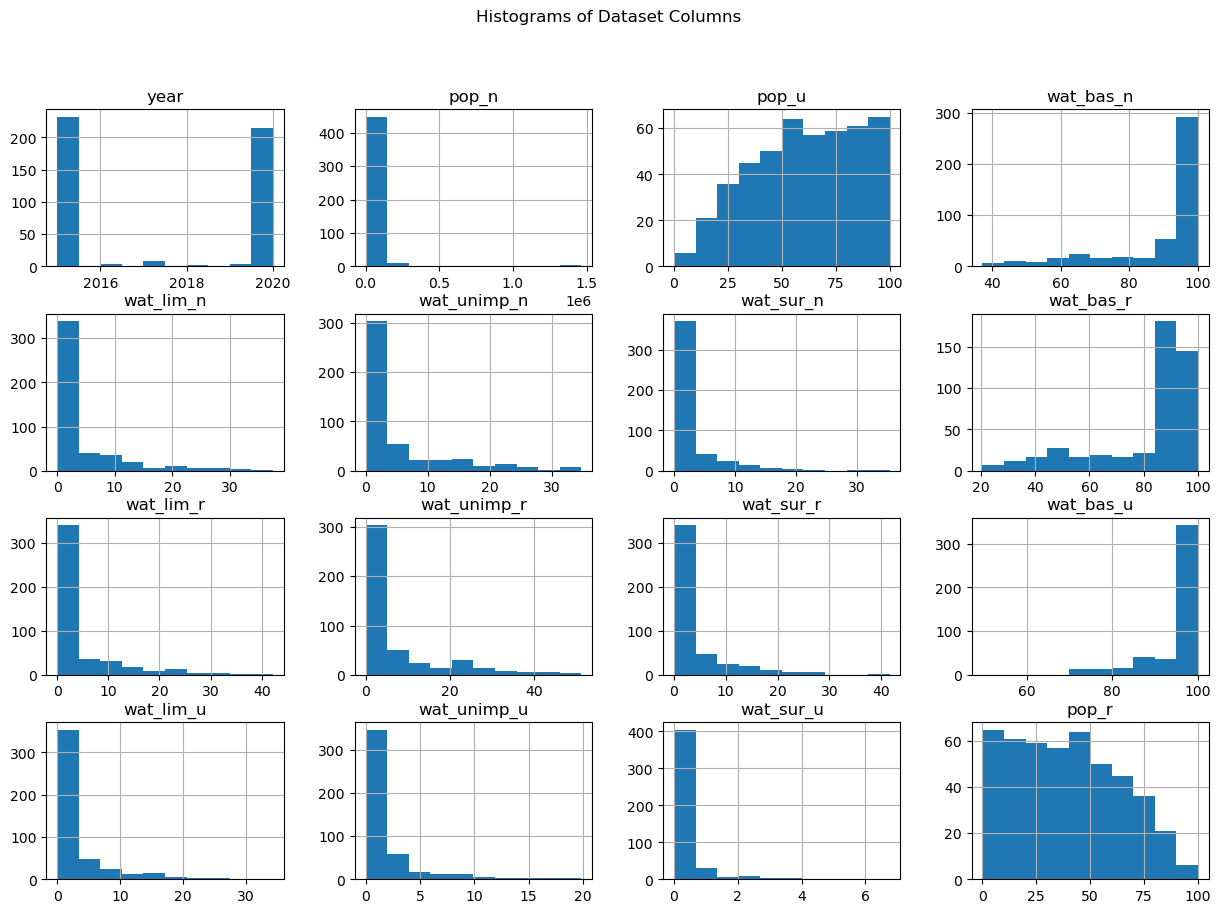

In [17]:
# Visualise columns in the dataset
def plot_histograms(data):
    numerical = data.select_dtypes(include=[np.number])
    numerical.hist(bins=10, figsize=(15, 10))
    plt.suptitle("Histograms of Dataset Columns")
    plt.show()

plot_histograms(df)

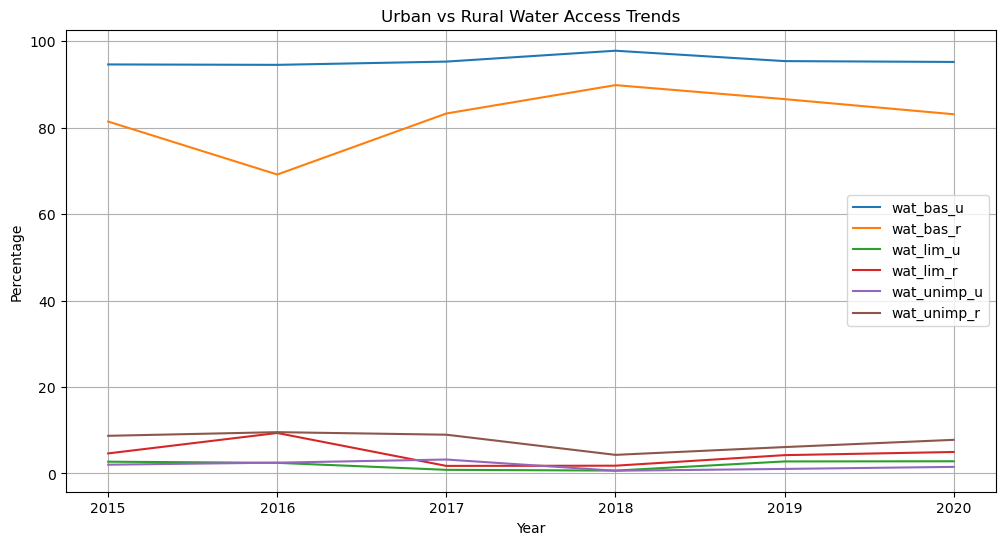

In [18]:
# Insights into Urban vs Rural water access trends
def urban_rural_trends(data):
    subset = data[['year', 'wat_bas_u', 'wat_bas_r', 'wat_lim_u', 'wat_lim_r', 'wat_unimp_u', 'wat_unimp_r']]
    subset_mean = subset.groupby('year').mean()

    plt.figure(figsize=(12, 6))
    for column in subset_mean.columns:
        plt.plot(subset_mean.index, subset_mean[column], label=column)

    plt.title('Urban vs Rural Water Access Trends')
    plt.xlabel('Year')
    plt.ylabel('Percentage')
    plt.legend()
    plt.grid(True)
    plt.show()

urban_rural_trends(df)

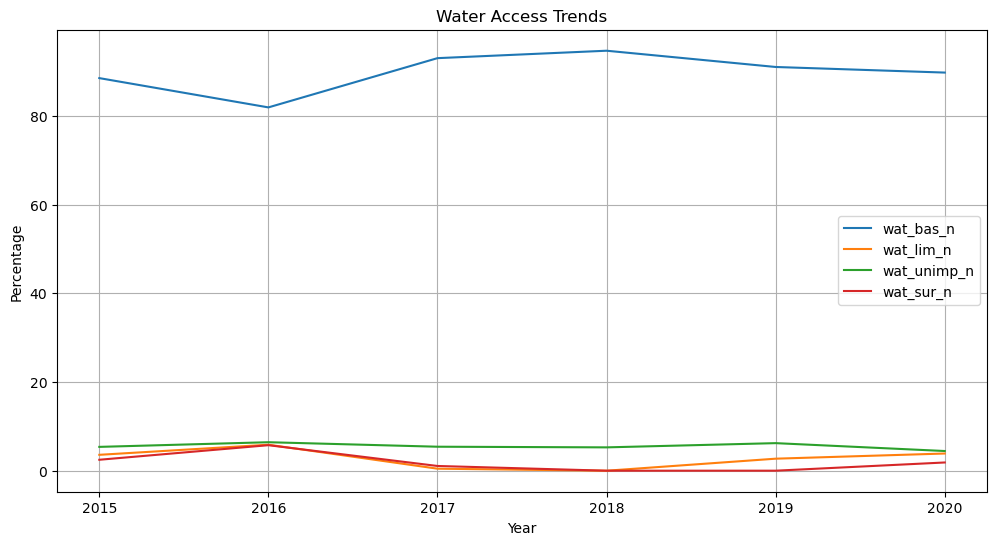

In [19]:
# Insights into Urban vs Rural water access trends
def total_water_trends(data):
    subset = data[['year', 'wat_bas_n', 'wat_lim_n', 'wat_unimp_n', 'wat_sur_n']]
    subset_mean = subset.groupby('year').mean()

    plt.figure(figsize=(12, 6))
    for column in subset_mean.columns:
        plt.plot(subset_mean.index, subset_mean[column], label=column)

    plt.title('Water Access Trends')
    plt.xlabel('Year')
    plt.ylabel('Percentage')
    plt.legend()
    plt.grid(True)
    plt.show()

total_water_trends(df)

In [20]:

# Top countries with the highest basic water access (urban and rural)
def top_countries_by_water_access(data):
    latest_year = data['year'].max()
    latest_data = data[data['year'] == latest_year]

    top_urban = latest_data.nlargest(10, 'wat_bas_u')[['name', 'wat_bas_u']]
    top_rural = latest_data.nlargest(10, 'wat_bas_r')[['name', 'wat_bas_r']]

    print("Top 10 Countries with Highest Basic Water Access (Urban):\n", top_urban)
    print("\nTop 10 Countries with Highest Basic Water Access (Rural):\n", top_rural)

top_countries_by_water_access(df)

Top 10 Countries with Highest Basic Water Access (Urban):
            name  wat_bas_u
0       Croatia      100.0
4       Andorra      100.0
5       Finland      100.0
6   Switzerland      100.0
9        Greece      100.0
10      Germany      100.0
11    Greenland      100.0
14  New Zealand      100.0
16      Denmark      100.0
17        Malta      100.0

Top 10 Countries with Highest Basic Water Access (Rural):
            name  wat_bas_r
4       Andorra      100.0
5       Finland      100.0
6   Switzerland      100.0
9        Greece      100.0
10      Germany      100.0
11    Greenland      100.0
14  New Zealand      100.0
16      Denmark      100.0
17        Malta      100.0
22       Tuvalu      100.0


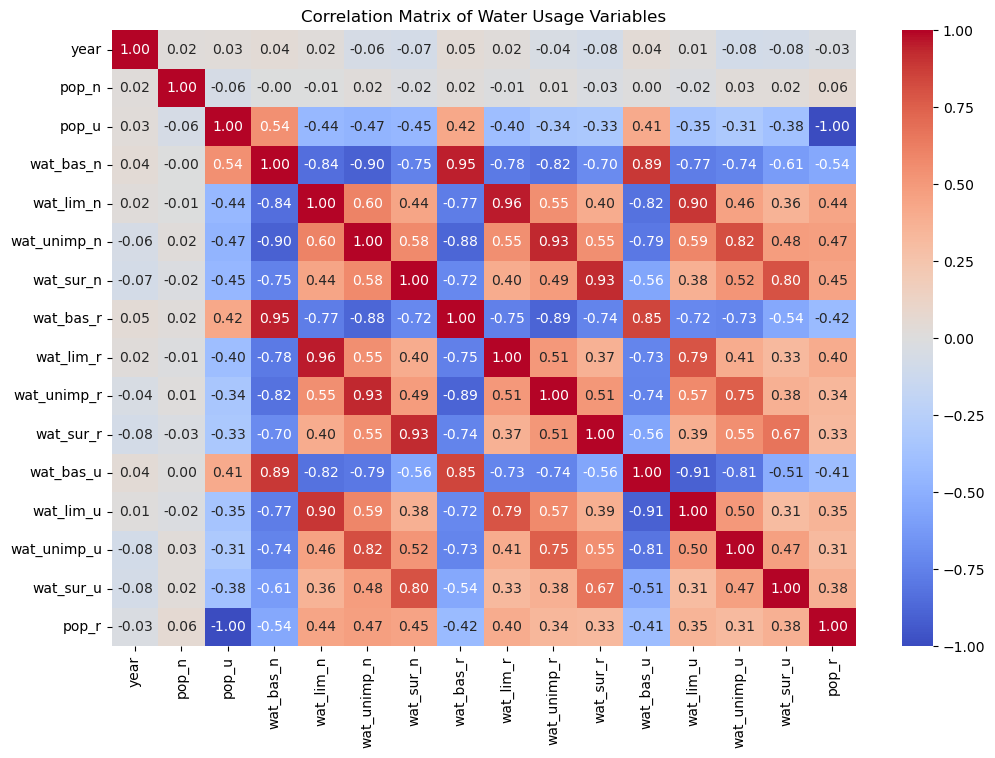

In [21]:
# Correlation analysis between variables
def correlation_analysis(data):
    # Select only numeric columns for correlation analysis
    numeric_data = data.select_dtypes(include=np.number)

    plt.figure(figsize=(12, 8))
    correlation_matrix = numeric_data.corr()  # Calculate correlation on numeric data
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix of Water Usage Variables')
    plt.show()

correlation_analysis(df)

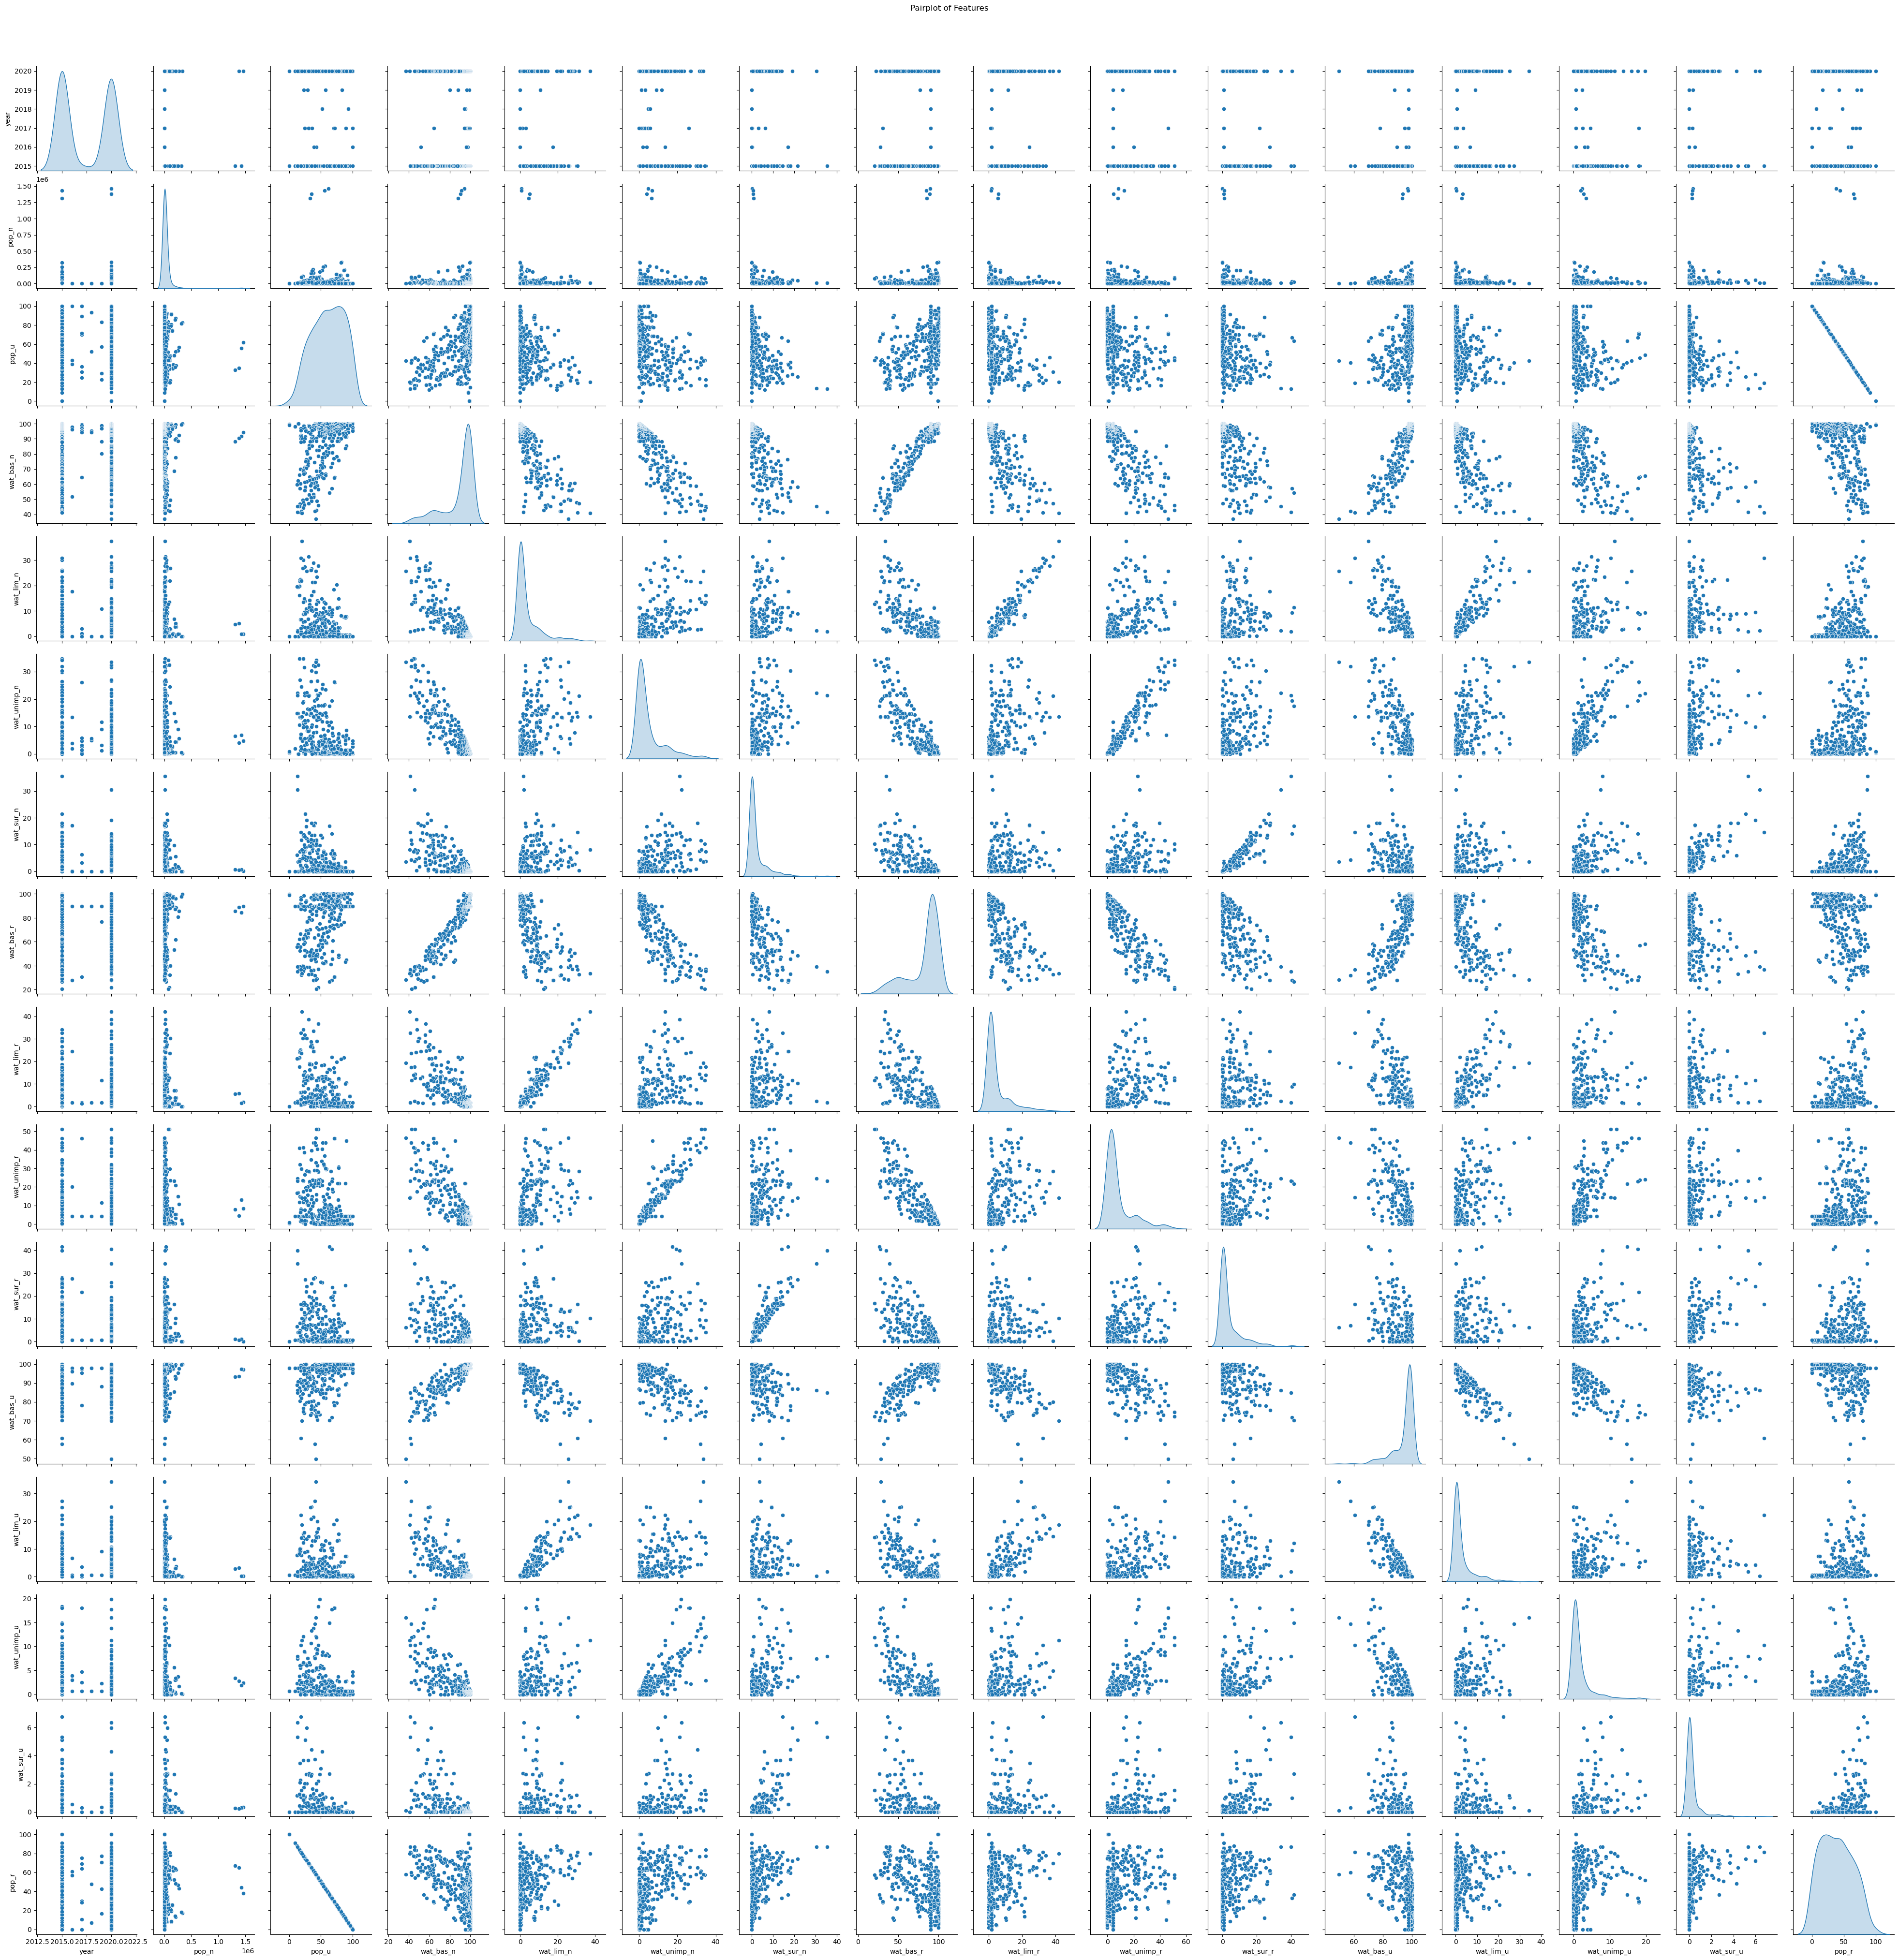

In [22]:
sns.pairplot(df, diag_kind="kde")
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

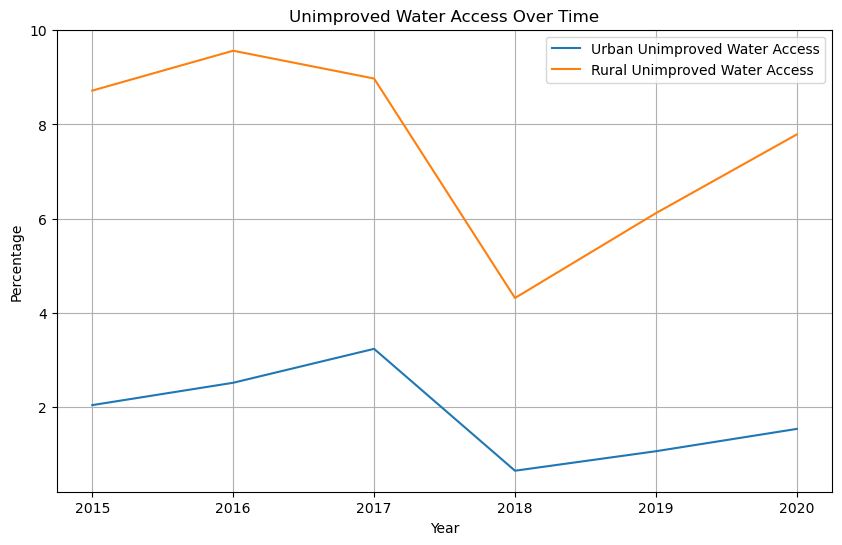

In [23]:
# Trend of unimproved water access over time
def unimproved_water_trend(data):
    subset = data[['year', 'wat_unimp_u', 'wat_unimp_r']]
    subset_mean = subset.groupby('year').mean()

    plt.figure(figsize=(10, 6))
    plt.plot(subset_mean.index, subset_mean['wat_unimp_u'], label='Urban Unimproved Water Access')
    plt.plot(subset_mean.index, subset_mean['wat_unimp_r'], label='Rural Unimproved Water Access')

    plt.title('Unimproved Water Access Over Time')
    plt.xlabel('Year')
    plt.ylabel('Percentage')
    plt.legend()
    plt.grid(True)
    plt.show()

unimproved_water_trend(df)

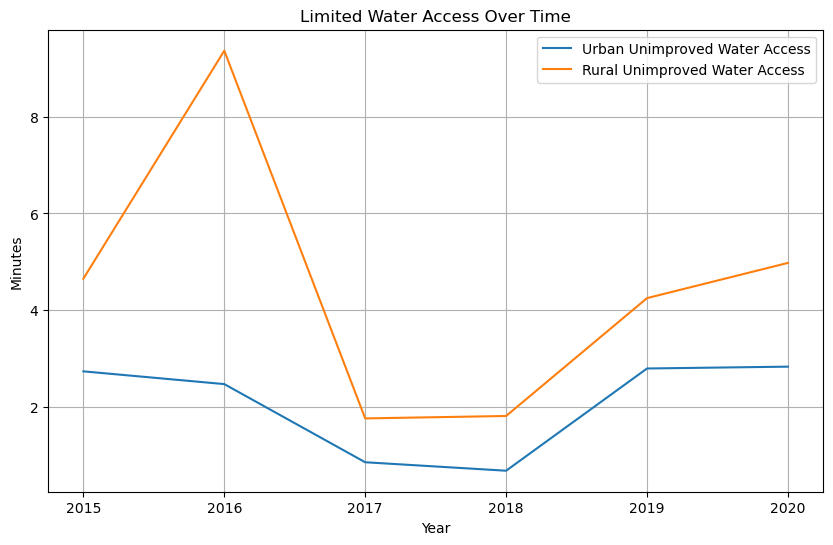

In [24]:
# Trend of limited water access over time
def limeted_water_trend(data):
    subset = data[['year', 'wat_lim_u', 'wat_lim_r']]
    subset_mean = subset.groupby('year').mean()

    plt.figure(figsize=(10, 6))
    plt.plot(subset_mean.index, subset_mean['wat_lim_u'], label='Urban Unimproved Water Access')
    plt.plot(subset_mean.index, subset_mean['wat_lim_r'], label='Rural Unimproved Water Access')

    plt.title('Limited Water Access Over Time')
    plt.xlabel('Year')
    plt.ylabel('Minutes')
    plt.legend()
    plt.grid(True)
    plt.show()

limeted_water_trend(df)

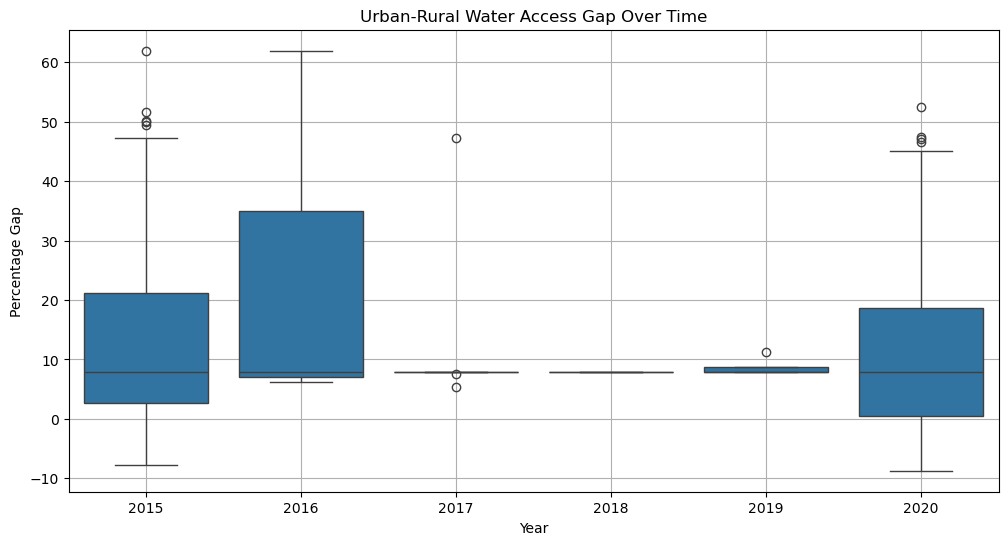

In [25]:
# Equity Analysis: Urban vs Rural Gap
def equity_analysis(data):
    data['urban_rural_gap'] = data['wat_bas_u'] - data['wat_bas_r']
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='year', y='urban_rural_gap', data=data)
    plt.title('Urban-Rural Water Access Gap Over Time')
    plt.xlabel('Year')
    plt.ylabel('Percentage Gap')
    plt.grid(True)
    plt.show()
    data.drop(columns=['urban_rural_gap'], inplace=True)

equity_analysis(df)

In [26]:
# Countries with consistent improvement
def consistent_improvement(data):
    improvement = data.groupby('name').apply(lambda x: (x['wat_bas_u'].iloc[-1] - x['wat_bas_u'].iloc[0]))
    top_improved = improvement.nlargest(10)
    print("Countries with the highest improvement in Urban Basic Water Access:\n", top_improved)

consistent_improvement(df)

Countries with the highest improvement in Urban Basic Water Access:
 name
South Sudan      9.310827
Guinea-Bissau    2.359383
Niger            1.694699
Benin            1.039143
Pakistan         0.778359
Nepal            0.717038
Chad             0.561429
China            0.404771
Bangladesh       0.328002
Namibia          0.277270
dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_42340\1160419261.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  improvement = data.groupby('name').apply(lambda x: (x['wat_bas_u'].iloc[-1] - x['wat_bas_u'].iloc[0]))


**Noramlizing features**

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['name']))

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

Optimal number of clusters (knee point): 4


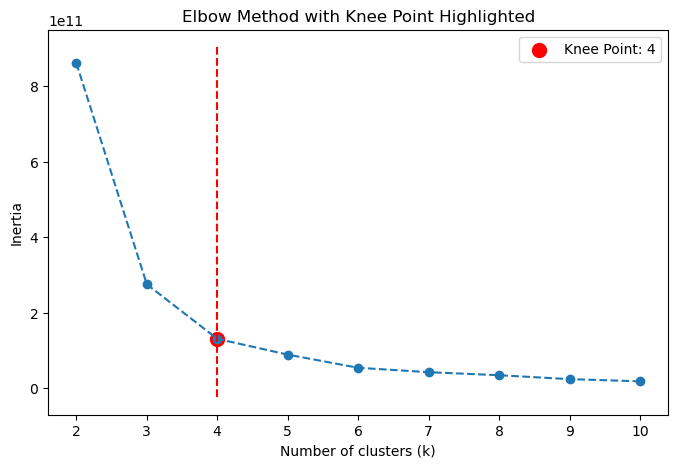

In [29]:
# # Define the range of cluster numbers to try
inertia = []
k_values = range(2, 11)
# Compute KMeans for each k and store the inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df.drop(columns=['name']))
    inertia.append(kmeans.inertia_)


knee_locator = KneeLocator(k_values, inertia, curve="convex", direction="decreasing")
print("Optimal number of clusters (knee point):", knee_locator.knee)

# Visualize the knee point
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.vlines(knee_locator.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red')
plt.scatter(knee_locator.knee, knee_locator.knee_y, s=100, color='red', label=f'Knee Point: {knee_locator.knee}')
plt.title('Elbow Method with Knee Point Highlighted')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.legend()
plt.show()

In [30]:
hy = {"n_init": 60, "random_state": 43}
km = KMeans(n_clusters=4, **hy)

# Fit KMeans and predict the labels
df['clusters'] = km.fit_predict(X_scaled)
# Analyze clusters
print(df.groupby('clusters')[df.drop(columns=['name']).columns.tolist()].mean())

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


                 year         pop_n      pop_u  wat_bas_n  wat_lim_n  \
clusters                                                               
0         2017.493151  20705.475323  82.420123  98.283787   0.583393   
1         2016.558824  26666.363241  39.272205  60.283638   8.541911   
2         2017.361842  57421.494450  42.821328  93.126548   1.904836   
3         2017.627119  17500.308123  39.982305  62.210166  16.740447   

          wat_unimp_n  wat_sur_n  wat_bas_r  wat_lim_r  wat_unimp_r  \
clusters                                                              
0            0.940255   0.185441  93.411366   1.484667     2.890520   
1           17.244536  13.929916  45.321487   9.478243    23.570893   
2            3.529360   1.418112  87.459551   2.993175     6.062896   
3           16.498032   4.551514  48.770972  18.733093    25.007461   

          wat_sur_r  wat_bas_u  wat_lim_u  wat_unimp_u  wat_sur_u      pop_r  \
clusters                                                    

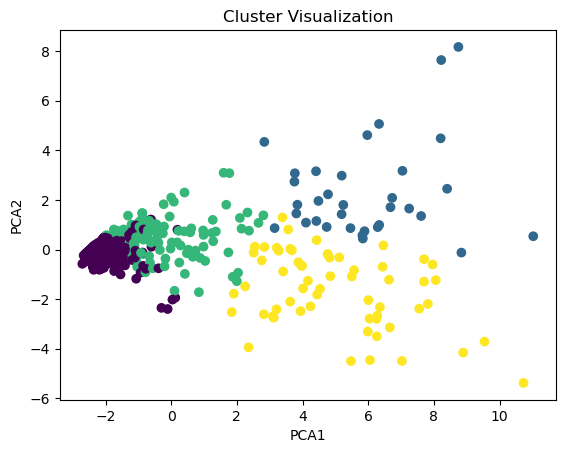

In [31]:
pca = PCA(n_components=4)
reduced_features = pca.fit_transform(X_scaled)

plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=df['clusters'], cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Cluster Visualization')
plt.show()

In [32]:
print(df['clusters'].value_counts())

clusters
0    219
2    152
3     59
1     34
Name: count, dtype: int64


In [33]:
km = KMeans(n_clusters=4, **hy)

# Fit KMeans and predict the labels
labels = km.fit_predict(X_scaled)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [34]:
wcss = km.inertia_  # Within-cluster sum of squares
sil = silhouette_score(X_scaled, labels)  # Silhouette score
cal = calinski_harabasz_score(X_scaled, labels)  # Calinski-Harabasz score

print(f"Within-Cluster Sum of Squares: {wcss}")
print(f"Silhouette Score: {sil}")
print(f"Calinski-Harabasz Score: {cal}")

Within-Cluster Sum of Squares: 3157.9824353255
Silhouette Score: 0.2614056518191533
Calinski-Harabasz Score: 207.13310053058228


In [35]:
df.drop(columns=['name'], inplace=True)

In [36]:
X = df.drop(columns=['clusters'])

In [37]:
labels = df['clusters']

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Convert back to DataFrame, preserving column names and index
scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, labels, test_size=0.2, random_state=42)

In [40]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
y_pred = random_forest.predict(X_test)

In [42]:
accuracy = random_forest.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 95.70%


In [43]:
score = random_forest.score(X_train, y_train)
rep = classification_report(y_test, y_pred)
conf = {"X": X_train, "y": y_train}

In [44]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        47
           1       1.00      0.83      0.91        12
           2       0.94      0.94      0.94        17
           3       0.85      1.00      0.92        17

    accuracy                           0.96        93
   macro avg       0.95      0.94      0.94        93
weighted avg       0.96      0.96      0.96        93



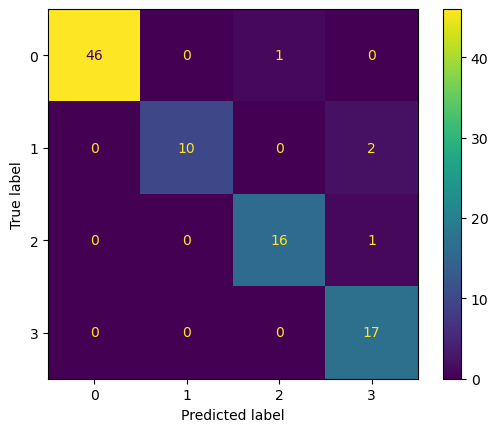

In [45]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(random_forest, X_test, y_test)
plt.show()

In [46]:
# Get feature importances from the RandomForest model
importances = random_forest.feature_importances_

In [47]:
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

In [48]:
# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [49]:
feature_importance_df

,Feature,Importance
2,pop_u,0.248308
15,pop_r,0.229658
3,wat_bas_n,0.101191
7,wat_bas_r,0.078451
11,wat_bas_u,0.062134
4,wat_lim_n,0.050497
6,wat_sur_n,0.046252
10,wat_sur_r,0.033052
9,wat_unimp_r,0.028279
12,wat_lim_u,0.026066


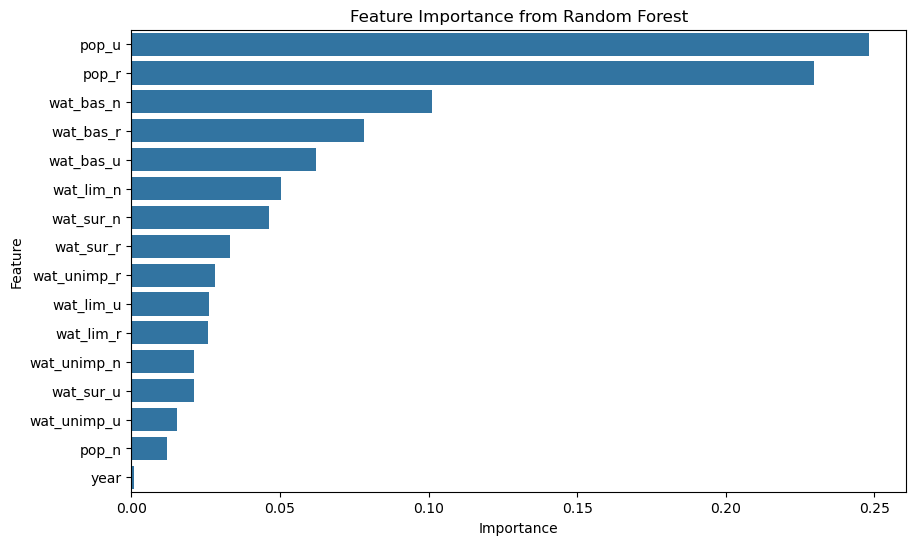

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

In [110]:
important_features = feature_importance_df.head(11)
important_features_names = important_features['Feature'].tolist()
X_importannt = df[important_features_names]

In [122]:
X_importannt

,pop_u,pop_r,wat_bas_n,wat_bas_r,wat_bas_u,wat_lim_n,wat_sur_n,wat_sur_r,wat_unimp_r,wat_lim_u,wat_lim_r
0,57.552998,42.447002,96.604139,89.875800,100.000000,0.406530,0.009381,0.713097,4.310939,0.000000,1.804724
1,56.155003,43.844997,96.604139,89.875800,100.000000,0.406530,0.009381,0.713097,4.310939,0.000000,1.804724
2,92.111000,7.889000,96.604139,89.875800,99.790421,0.406530,0.009381,0.713097,4.310939,0.000000,1.804724
3,78.046005,21.953995,100.000005,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,87.916000,12.084000,100.000004,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
459,19.428001,80.571999,42.070067,32.451767,81.959177,21.738790,11.713286,14.168125,29.781556,14.025967,23.598552
460,13.012000,86.988000,41.485508,34.990633,84.905143,1.809953,35.443486,39.951094,23.253549,1.844908,1.804724
461,18.851999,81.148001,41.247509,36.726780,60.706877,30.695737,14.502360,16.300355,14.310065,22.228554,32.662800
462,20.198999,79.801001,40.950927,33.593629,70.017704,37.426963,8.084555,10.130894,14.111096,18.710661,42.164381


In [118]:
scaler = StandardScaler()
inportant = scaler.fit_transform(X_importannt)

In [124]:
important_df = pd.DataFrame(inportant, columns=X_importannt.columns, index=X_importannt.index)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(important_df, labels, test_size=0.2, random_state=42)

In [128]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [130]:
y_pred = random_forest.predict(X_test)

In [132]:
accuracy = random_forest.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 94.62%


In [134]:
joblib.dump(random_forest, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [136]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']